In [1]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.metrics import pairwise_distances

In [2]:
def generate_simplified_data(dim: int=2, component_size: int=100):
    means = np.array([
        [-1.0, 1.0],
        [3.0, 2.0]
    ])
    raw_data = [
        np.random.multivariate_normal(
            mean=means[0],
            size=component_size,
            cov=np.eye(dim)
        ),
        np.random.multivariate_normal(
            mean=means[1],
            size=component_size,
            cov=np.array([
                [1.0, 1.0],
                [5.0, 2.0]
            ])
        ),
    ]
    data_frames = [
        pd.DataFrame({ **{ f"feat_{j}": X[:, j] for j in range(X.shape[1]) }, 'true_label': i, 'noisy_label': i })
        for i, X in enumerate(raw_data)
    ]
    return pd.concat(data_frames).reset_index(drop=True)

def compute_observed_means(df, label_attr: str="noisy_label"):
    feature_names = [c for c in df.columns if c.startswith("feat_")]
    df_means = df.groupby(label_attr).mean()
    for label in df_means.index:
        for feature_name in feature_names:
            df.loc[df[label_attr] == label, f"mu_{feature_name}"] = df_means.loc[label, feature_name]

In [3]:
df_data = generate_simplified_data()

/tmp/ipykernel_4303/929698228.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(


In [4]:
feature_names = [c for c in df_data.columns if c.startswith("feat_")]

In [5]:
X = df_data[feature_names].to_numpy()

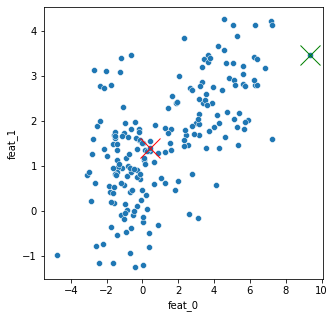

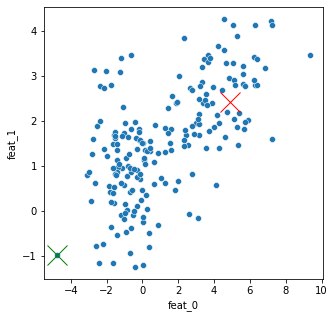

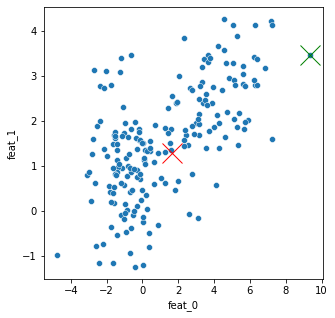

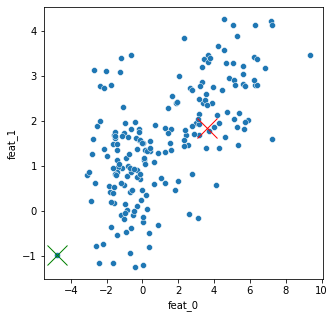

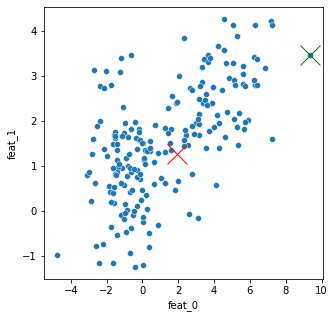

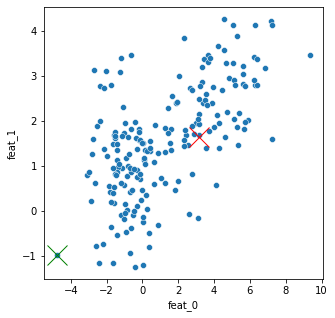

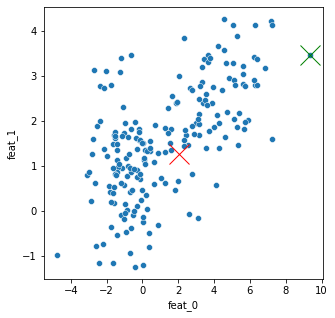

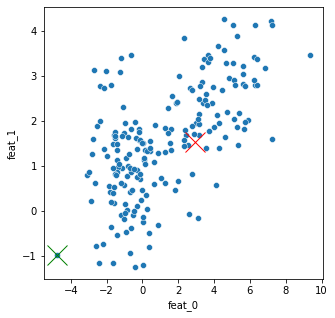

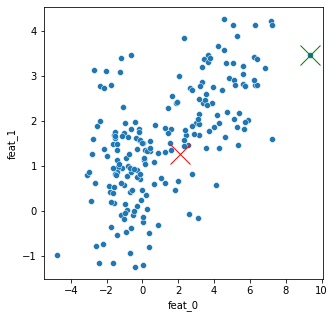

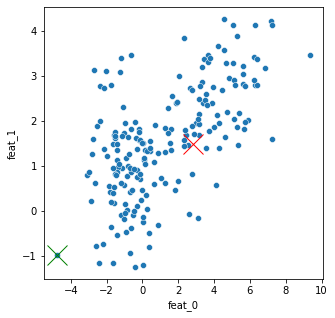

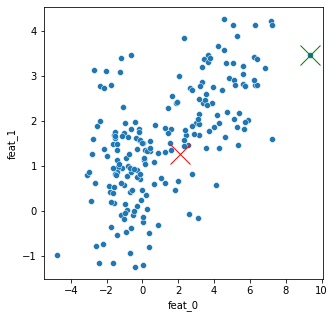

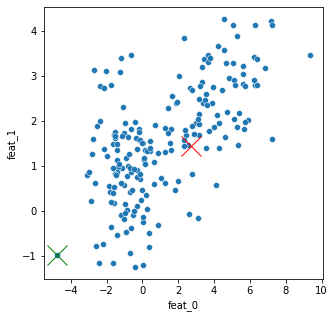

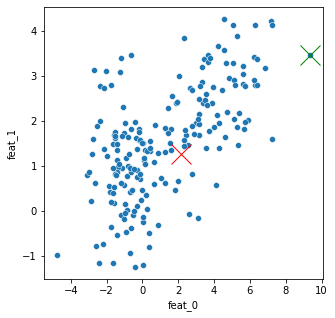

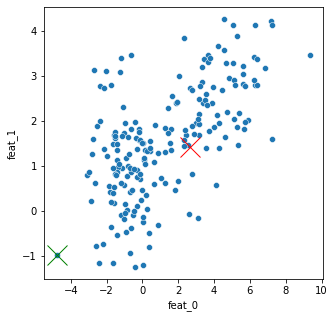

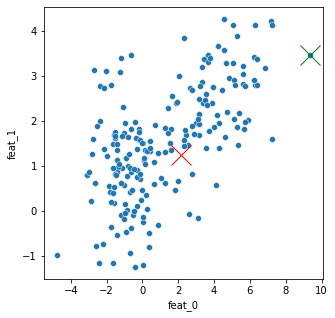

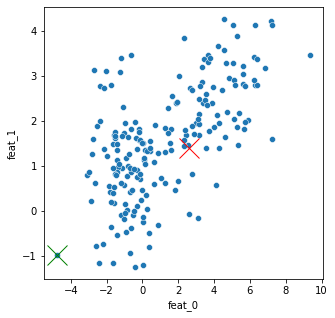

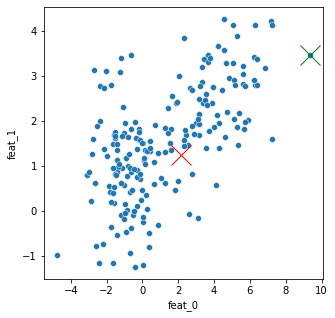

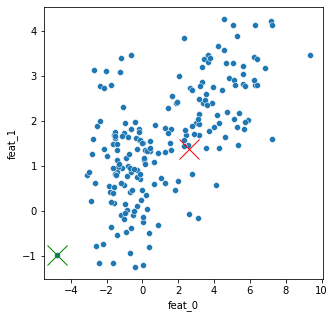

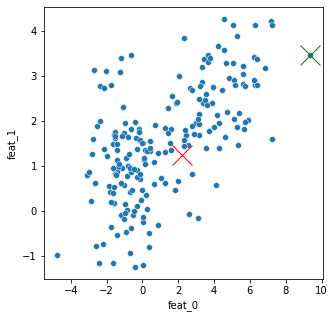

In [6]:
random_point_index = np.random.choice(X.shape[0])
T = [random_point_index]
c = X[random_point_index].reshape(1, -1).copy()

for i in range(1, 20):
    farthest_point_index = np.argmax(pairwise_distances(c, X))
    T.append(farthest_point_index)
    farthest_point = X[farthest_point_index]
    
    
    fig, ax = plt.subplots(figsize=(5,5))
    sns.scatterplot(x="feat_0", y="feat_1", data=df_data, ax=ax)
    ax.plot(c[0,0], c[0,1], marker="x", markersize=20, markeredgecolor="red", markerfacecolor="green")
    ax.plot(farthest_point[0], farthest_point[1], marker="x", markersize=20, markeredgecolor="green")
    
    c = c + (farthest_point - c)/(i+1)


In [7]:
outer_point_indices = list(set(T))
outer_points = X[outer_point_indices]
radius = np.max(pairwise_distances(c, outer_points))

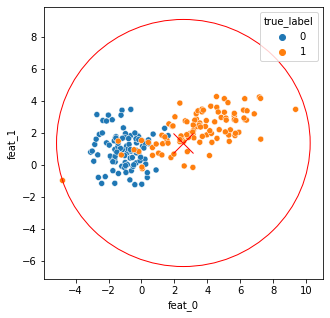

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x="feat_0", y="feat_1", hue="true_label", data=df_data, ax=ax)
ax.plot(c[0,0], c[0,1], marker="x", markersize=20, markeredgecolor="red")
circle1 = plt.Circle((c[0,0], c[0,1]), radius, color='r', fill=None)
ax.add_patch(circle1)
# ax.plot(farthest_point[0], farthest_point[1], marker="x", markersize=20, markeredgecolor="pink")

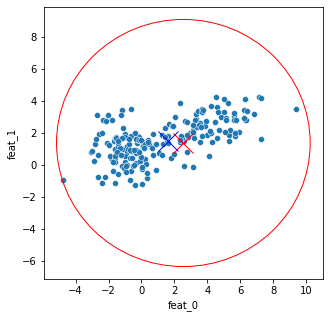

In [9]:
mean = c.reshape(-1)
cov = np.eye(mean.shape[0])
r = np.random.multivariate_normal(mean=mean, cov=cov)
length = np.random.uniform(low=0, high=radius)

r = length * (r / np.linalg.norm(r))


fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x="feat_0", y="feat_1", data=df_data, ax=ax)
ax.plot(mean[0], mean[1], marker="x", markersize=20, markeredgecolor="red")
ax.plot(r[0], r[1], marker="x", markersize=20, markeredgecolor="blue")
circle1 = plt.Circle((c[0,0], c[0,1]), radius, color='r', fill=None)
ax.add_patch(circle1)
# ax.plot(farthest_point[0], farthest_point[1], marker="x", markersize=20, markeredgecolor="pink")